# Dataset Processing for Sentinel-2 Image Matching

In this notebook, we will:
1. Download Sentinel-2 images from the provided dataset.
2. Preprocess the images (resize and convert to grayscale).
3. Save the preprocessed images for further use in the image matching algorithm.


In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import glob
import shutil

Found 50 TCI images.


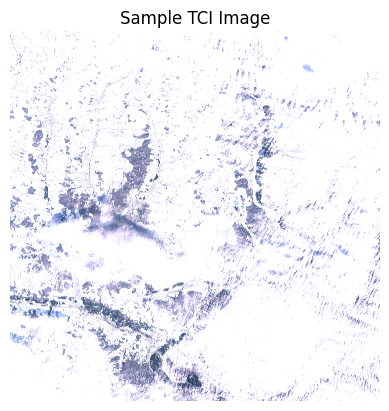

In [13]:
dataset_path = '/kaggle/input/deforestation-in-ukraine/'

# Recursively search for TCI images (*.jp2 files with "TCI" in their name)
tci_images = glob.glob(os.path.join(dataset_path, '**', '*_TCI.jp2'), recursive=True)
print(f"Found {len(tci_images)} TCI images.")

sample_image_path = tci_images[0]
image = cv2.imread(sample_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Sample TCI Image')
plt.axis('off')
plt.show()


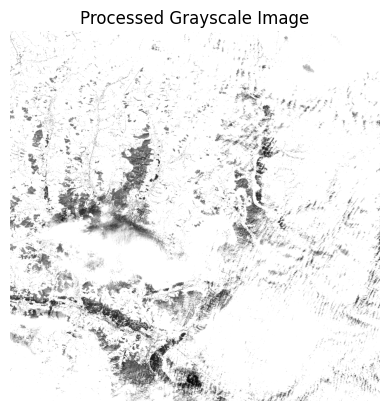

In [14]:
# resize and grayscale conversion
def preprocess_image(image_path, target_size=(1024,1024), grayscale=False):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, target_size)
    if grayscale:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values to range [0, 1]
    image_normalized = image_resized / 255.0
    
    return image_normalized

processed_image = preprocess_image(sample_image_path, target_size=(1024, 1024), grayscale=True)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Grayscale Image')
plt.axis('off')
plt.show()

In [15]:
output_dir = '/kaggle/working/processed_tci_images/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process and save all TCI images
def process_and_save_images(tci_image_files, output_dir, max_size=1024):
    for image_file in tci_image_files:
        processed_image = preprocess_image(image_file, target_size=(max_size, max_size), grayscale=True)

        # Create the output filename (convert from .jp2 to .jpg)
        output_filename = os.path.splitext(os.path.basename(image_file))[0] + '.jpg'
        output_filepath = os.path.join(output_dir, output_filename)

        cv2.imwrite(output_filepath, processed_image * 255, [cv2.IMWRITE_JPEG_QUALITY, 90])
        print(f"Processed and saved: {output_filepath}")

process_and_save_images(tci_images, output_dir, max_size=1024)

Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20160212T084052_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20160621T084012_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UXA_20190606T083601_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190313T083739_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190611T083609_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UXA_20190427T083601_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190701T083609_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UXA_20180726T084009_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190721T083609_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190621T083609_TCI.jpg
Processed and saved: /kaggle/working/processed_tci_images/T36UYA_20190825T083601_TCI.jpg
Processed and saved: 

In [3]:
def rename_images_sequentially(output_dir):
    image_files = glob.glob(os.path.join(output_dir, "*.jpg"))
    
    for idx, image_file in enumerate(image_files, start=1):
        new_filename = f"img_{idx}.jpg"
        new_filepath = os.path.join(output_dir, new_filename)
        os.rename(image_file, new_filepath)

rename_images_sequentially(output_dir)

I am archiving the folder containing the preprocessed dataset into a zip file so that I can download it to my computer. After downloading, I will work with the dataset in my local IDE for further processing or model training. This allows me to easily transfer the processed images from the Kaggle environment to my local development environment.

In [ ]:
folder_to_zip = '/kaggle/working/processed_tci_images'
shutil.make_archive('/kaggle/working/processed_tci_images', 'zip', folder_to_zip)